In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [3]:
# Print out the dimensions of the training DataFrame
df_train.shape

(165034, 14)

In [4]:
# Print out the dimensions of the testing DataFrame 
# The testing DataFrame has the same number of columns, besides the target 'Exited'
df_test.shape

(110023, 13)

In [5]:
# Let's check the data types of our DataFrame
df_train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Print out the first 5 rows to get an understanding of the DataFrame
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
# Another way to see the information
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


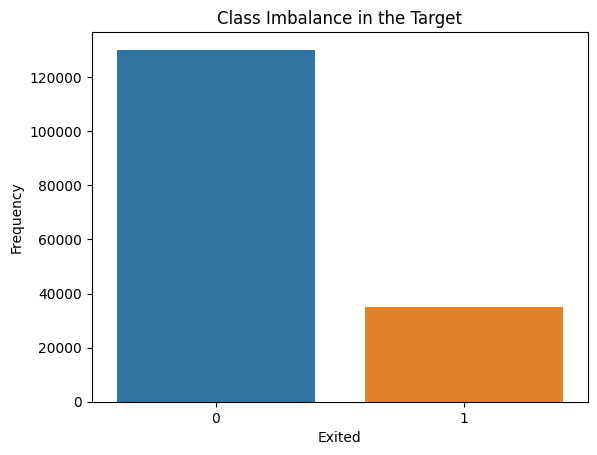

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the countplot
sns.countplot(x='Exited', data=df_train)

# Set the names on the axes and the title
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Class Imbalance in the Target')

# Print out the graph
plt.show()

In [9]:
# Check the amount of null values in our DataFrame
df_train.isnull().sum().sum()

0

In [10]:
# Check which attributes are categorical 
categorical_variables = df_train.select_dtypes('object').columns
print(categorical_variables)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


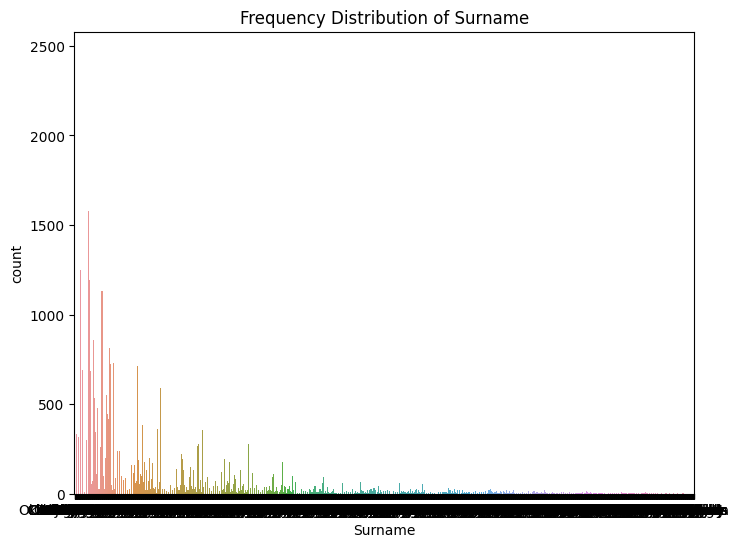

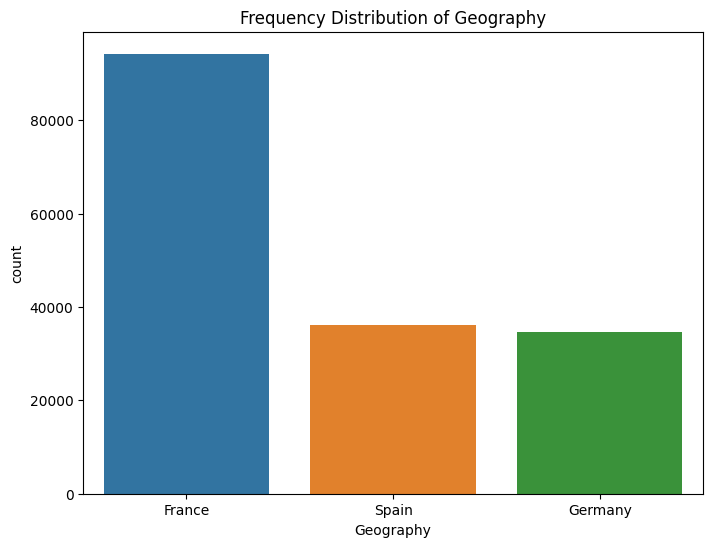

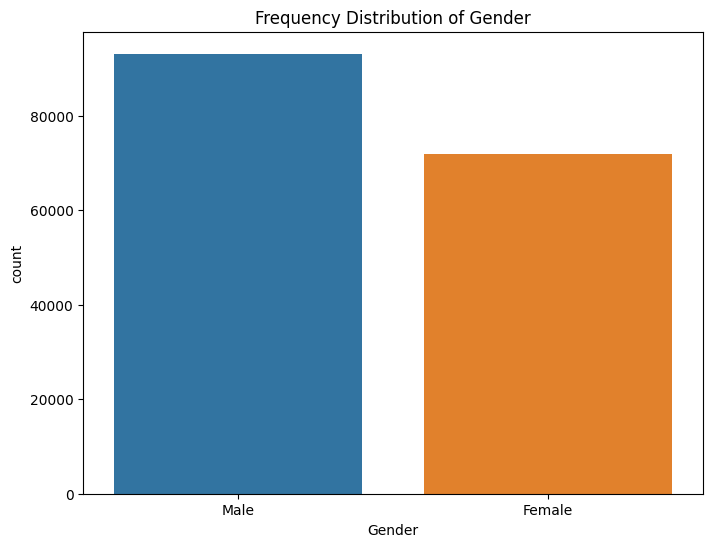

In [11]:
# Check the frequency distributions of our categorical variables
for column in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Frequency Distribution of {column}')
    plt.show()

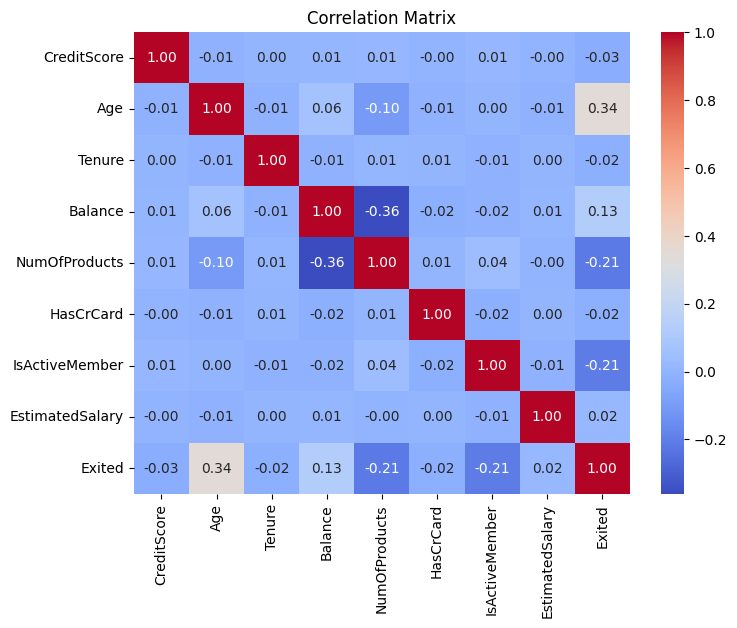

In [12]:
# Create a Correlation Matrix
correlation_matrix = df_train.drop(columns = ['Surname', 'Geography', 'Gender', 'id', 'CustomerId']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

# annot=True allows to print the numeric value of the correlation
# .2f formats the values as floating-point numbers with 2 decimal places

plt.show()

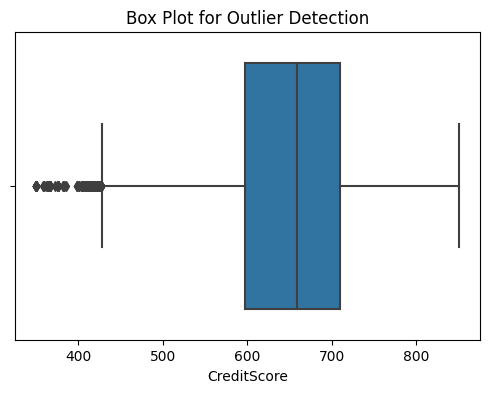

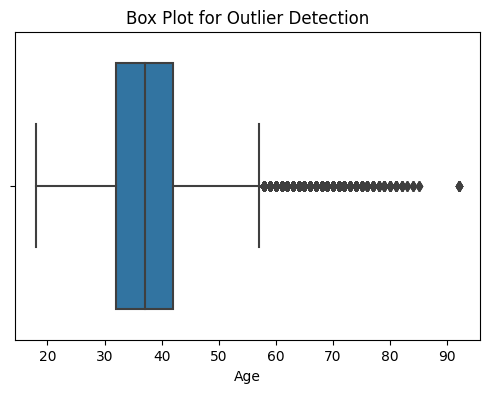

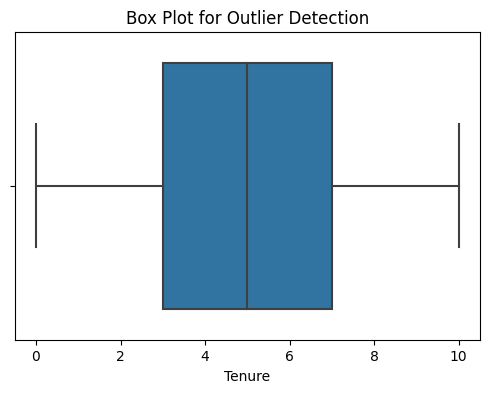

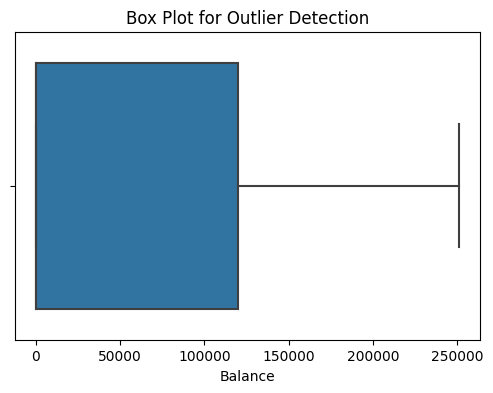

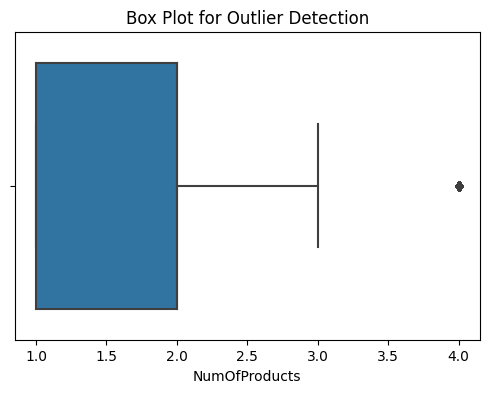

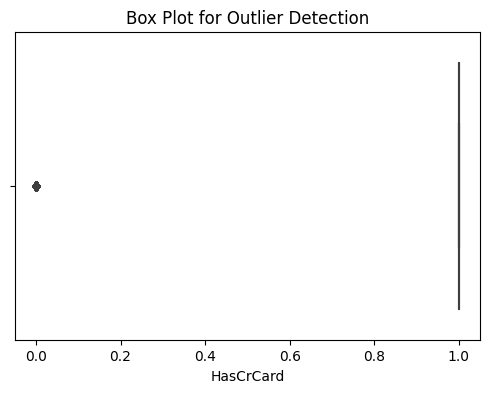

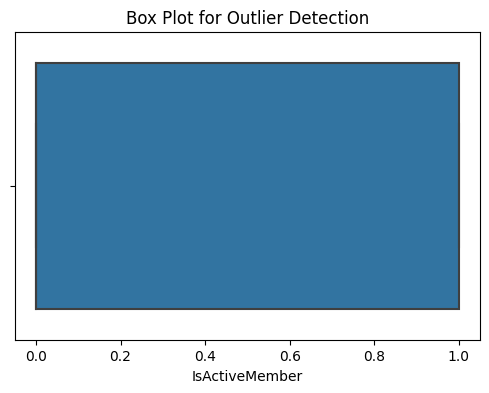

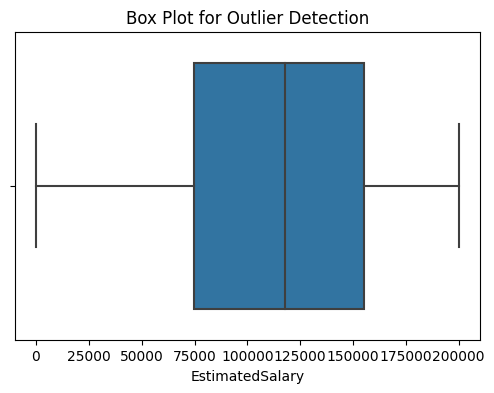

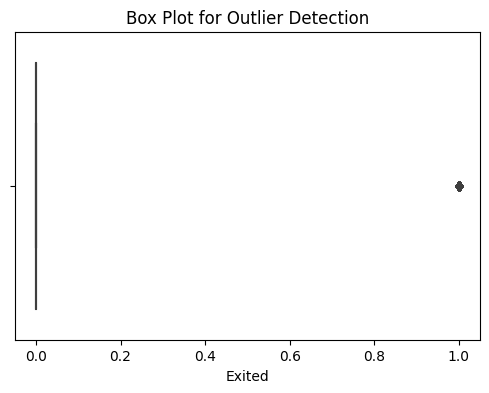

In [13]:
# Find out if we have any outliers 

numerical_attributes = df_train.drop(columns=['Surname', 'Geography', 'Gender', 'id', 'CustomerId'])
for column in numerical_attributes:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=numerical_attributes[column])
    plt.title('Box Plot for Outlier Detection')
    plt.show()

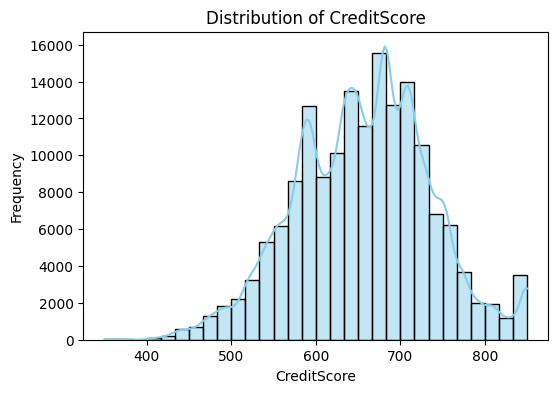

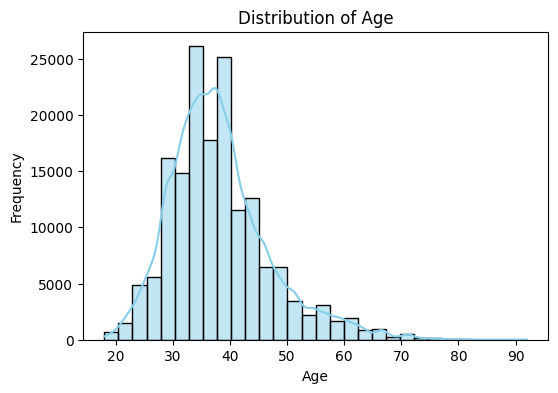

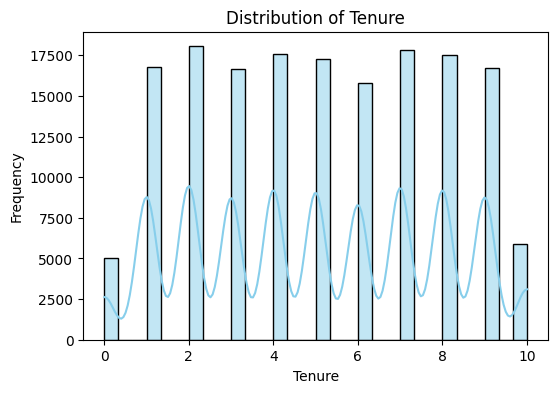

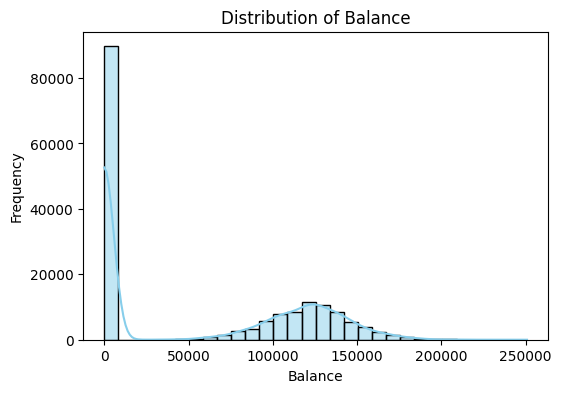

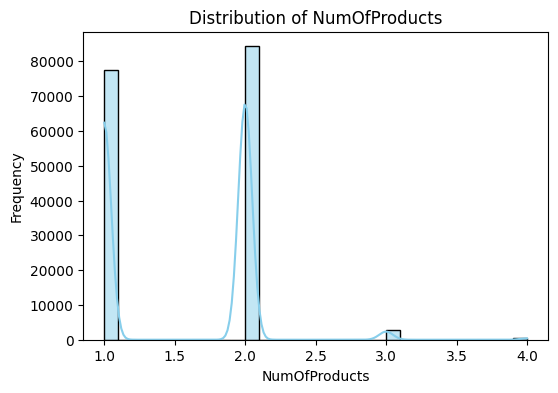

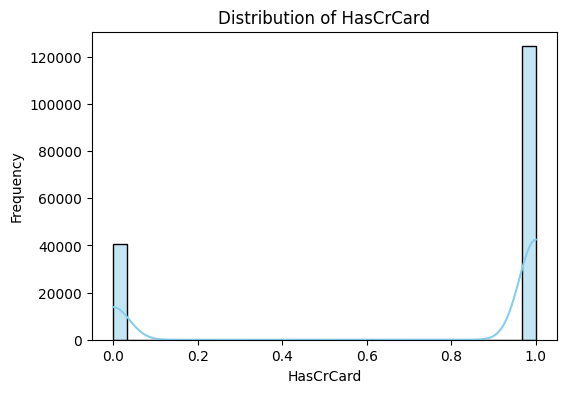

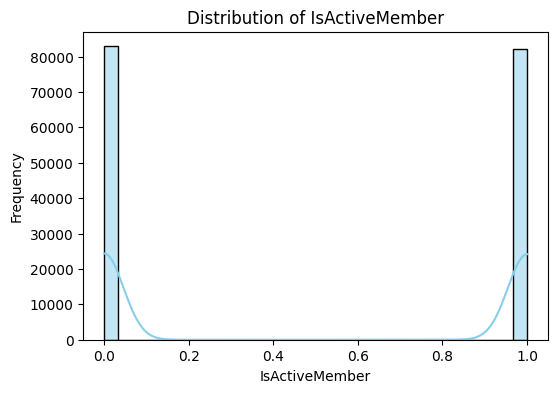

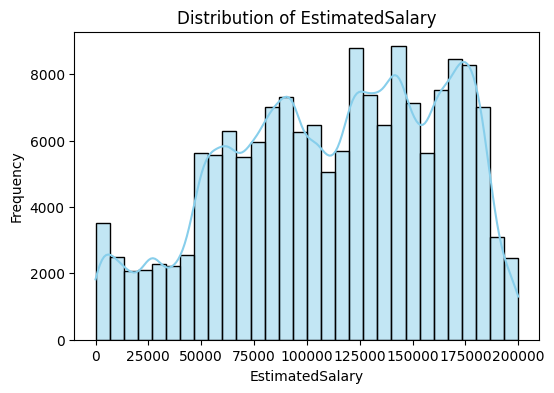

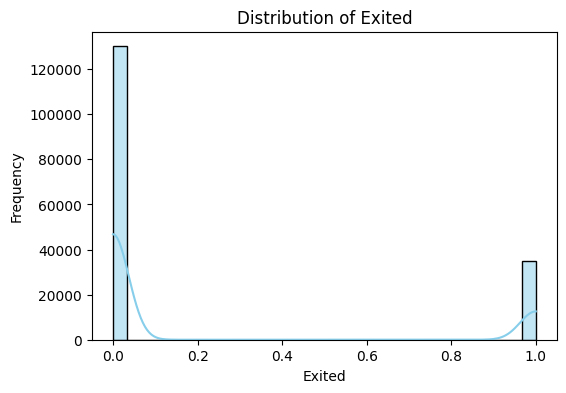

In [14]:
# Check the distributions for our numerical attributes

for column in numerical_attributes:
    plt.figure(figsize=(6, 4))
    sns.histplot(numerical_attributes[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    
    plt.show()

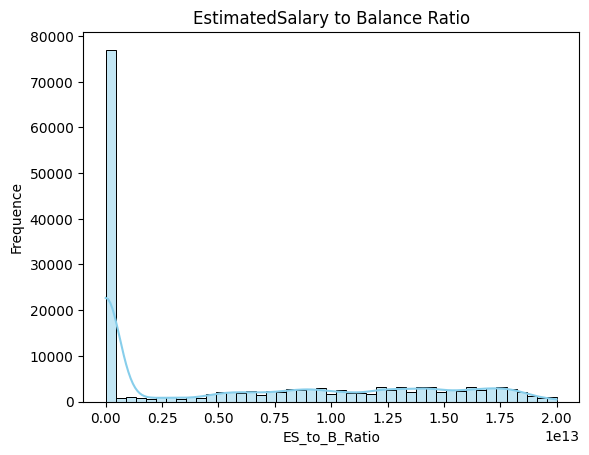

In [15]:
df_train['ES_to_B_Ratio'] = np.divide(df_train['EstimatedSalary'], df_train['Balance']+1e-8)
df_test['ES_to_B_Ratio'] = np.divide(df_test['EstimatedSalary'], df_test['Balance']+1e-8)

plt.figsize=(6, 4)
sns.histplot(df_train['ES_to_B_Ratio'], kde=True, color='skyblue')
plt.title('EstimatedSalary to Balance Ratio')
plt.xlabel('ES_to_B_Ratio')
plt.ylabel('Frequence')

plt.show()

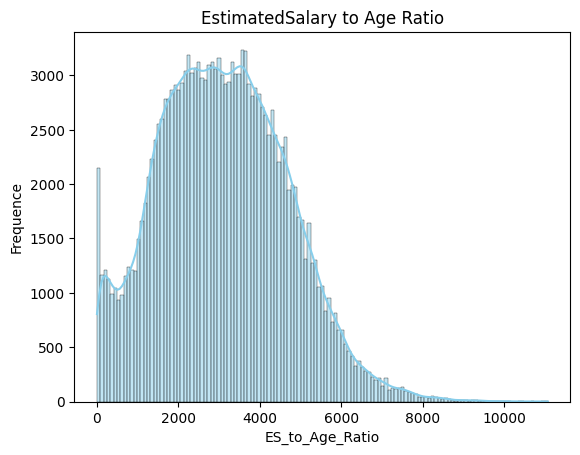

In [16]:
df_train['ES_to_Age_Ratio'] = np.divide(df_train['EstimatedSalary'], df_train['Age'])
df_test['ES_to_Age_Ratio'] = np.divide(df_test['EstimatedSalary'], df_test['Age'])

plt.figsize=(6, 4)
sns.histplot(df_train['ES_to_Age_Ratio'], kde=True, color='skyblue')
plt.title('EstimatedSalary to Age Ratio')
plt.xlabel('ES_to_Age_Ratio')
plt.ylabel('Frequence')

plt.show()

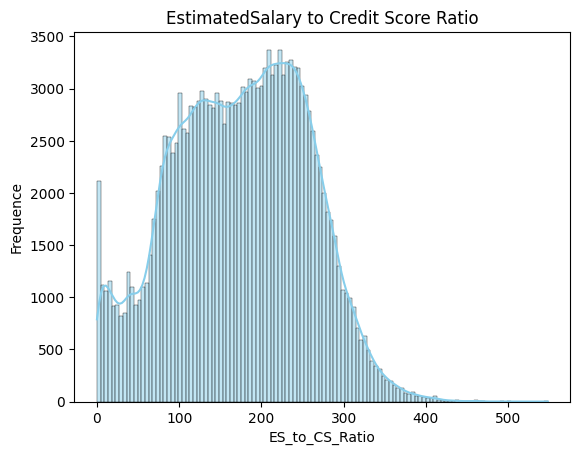

In [17]:
df_train['ES_to_CS_Ratio'] = np.divide(df_train['EstimatedSalary'], df_train['CreditScore'])
df_test['ES_to_CS_Ratio'] = np.divide(df_test['EstimatedSalary'], df_test['CreditScore'])

plt.figsize=(6, 4)
sns.histplot(df_train['ES_to_CS_Ratio'], kde=True, color='skyblue')
plt.title('EstimatedSalary to Credit Score Ratio')
plt.xlabel('ES_to_CS_Ratio')
plt.ylabel('Frequence')

plt.show()

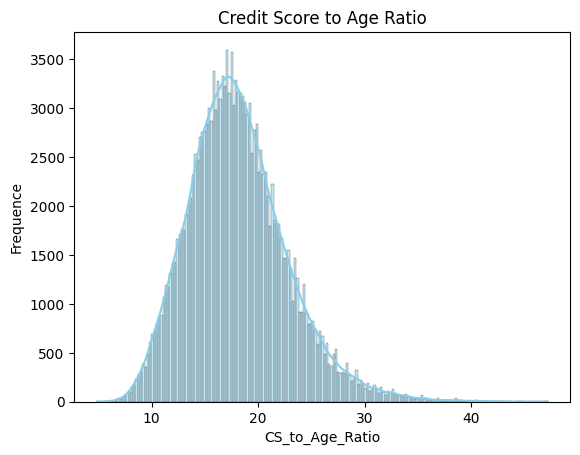

In [18]:
df_train['CS_to_Age_Ratio'] = np.divide(df_train['CreditScore'], df_train['Age'])
df_test['CS_to_Age_Ratio'] = np.divide(df_test['CreditScore'], df_test['Age'])

plt.figsize=(6, 4)
sns.histplot(df_train['CS_to_Age_Ratio'], kde=True, color='skyblue')
plt.title('Credit Score to Age Ratio')
plt.xlabel('CS_to_Age_Ratio')
plt.ylabel('Frequence')

plt.show()

In [19]:
bins = [
    (df_train['Age'] <= 28) ,
    (df_train['Age'] > 28) & (df_train['Age'] <= 33), 
    (df_train['Age'] > 33) & (df_train['Age'] <= 40),
    (df_train['Age'] > 40) & (df_train['Age'] <= 50),
    (df_train['Age'] > 50) & (df_train['Age'] <= 69),
    (df_train['Age'] > 69)
]
choices = [1, 2, 3, 4, 5, 6]
df_train['Age_Slicer'] = np.select(bins, choices, default=0)
bins = [
    (df_test['Age'] <= 28) ,
    (df_test['Age'] > 28) & (df_test['Age'] <= 33), 
    (df_test['Age'] > 33) & (df_test['Age'] <= 40),
    (df_test['Age'] > 40) & (df_test['Age'] <= 50),
    (df_test['Age'] > 50) & (df_test['Age'] <= 69),
    (df_test['Age'] > 69)
]
choices = [1, 2, 3, 4, 5, 6]
df_test['Age_Slicer'] = np.select(bins, choices, default=0)

In [20]:
estimated_salary_bins = [
    (df_train['EstimatedSalary'] <= 50000),
    (df_train['EstimatedSalary'] > 50000) & (df_train['EstimatedSalary'] < 75000),
    (df_train['EstimatedSalary'] > 75000) & (df_train['EstimatedSalary'] < 110000),
    (df_train['EstimatedSalary'] > 110000) & (df_train['EstimatedSalary'] < 160000),
    (df_train['EstimatedSalary'] > 160000)
]

estimated_salary_choices = [1, 2, 3, 4, 5]
df_train['EstimatedSalary_Binned'] = np.select(estimated_salary_bins, estimated_salary_choices, default=0)

estimated_salary_bins = [
    (df_test['EstimatedSalary'] <= 50000),
    (df_test['EstimatedSalary'] > 50000) & (df_test['EstimatedSalary'] < 75000),
    (df_test['EstimatedSalary'] > 75000) & (df_test['EstimatedSalary'] < 110000),
    (df_test['EstimatedSalary'] > 110000) & (df_test['EstimatedSalary'] < 160000),
    (df_test['EstimatedSalary'] > 160000)
]

estimated_salary_choices = [1, 2, 3, 4, 5]
df_test['EstimatedSalary_Binned'] = np.select(estimated_salary_bins, estimated_salary_choices, default=0)


In [21]:
balance_bins = [
    (df_train['Balance'] <= 50000),
    (df_train['Balance'] > 50000) & (df_train['Balance'] <= 125000),
    (df_train['Balance'] > 125000)
]

balance_choices = [1, 2, 3]
df_train['Balance_Binned'] = np.select(balance_bins, balance_choices, default=0)

balance_bins = [
    (df_test['Balance'] <= 50000),
    (df_test['Balance'] > 50000) & (df_test['Balance'] <= 125000),
    (df_test['Balance'] > 125000)
]

balance_choices = [1, 2, 3]
df_test['Balance_Binned'] = np.select(balance_bins, balance_choices, default=0)

In [22]:
credit_score_bins = [
    (df_train['CreditScore'] <= 580),
    (df_train['CreditScore'] > 580) & (df_train['CreditScore'] <= 675),
    (df_train['CreditScore'] > 675) & (df_train['CreditScore'] <= 780),
    (df_train['CreditScore'] > 780)
]

credit_score_choices = [1, 2, 3, 4]
df_train['CreditScore_Binned'] = np.select(credit_score_bins, credit_score_choices, default=0)

credit_score_bins = [
    (df_test['CreditScore'] <= 580),
    (df_test['CreditScore'] > 580) & (df_test['CreditScore'] <= 675),
    (df_test['CreditScore'] > 675) & (df_test['CreditScore'] <= 780),
    (df_test['CreditScore'] > 780)
]

credit_score_choices = [1, 2, 3, 4]
df_test['CreditScore_Binned'] = np.select(credit_score_bins, credit_score_choices, default=0)

In [23]:
# Feature encode the attribute 'Surname'

df_train['Surname_Frequency'] = df_train['Surname'].map(df_train['Surname'].value_counts())
df_test['Surname_Frequency'] = df_test['Surname'].map(df_test['Surname'].value_counts())

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Use TfidfVectorizer for TF-IDF Encoding

tfidf_vectorizer = TfidfVectorizer()
surname_tfidf = tfidf_vectorizer.fit_transform(df_train['Surname'])
surname_tfidf_test = tfidf_vectorizer.transform(df_test['Surname'])

# Creating a DataFrame with TF-IDF Features 

surname_tfidf_df = pd.DataFrame(surname_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
surname_tfidf_test_df = pd.DataFrame(surname_tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Applying TruncatedSVD for dimensionality reduction

n_components=5
svd = TruncatedSVD(n_components=n_components)
surname_tfidf_svd = svd.fit_transform(surname_tfidf_df)
surname_tfidf_test_svd = svd.transform(surname_tfidf_test_df)


# Creating DataFrame with TruncatedSVD features

surname_tfidf_svd_df = pd.DataFrame(surname_tfidf_svd, columns=[f'Surname_TTFIDF_SVD_{i}' for i in range(n_components)])
surname_tfidf_test_svd_df = pd.DataFrame(surname_tfidf_test_svd, columns=[f'Surname_TTFIDF_SVD_{i}' for i in range(n_components)])

# Concatenating the new features to the original DataFrame

df_train = pd.concat([df_train, surname_tfidf_svd_df], axis=1)
df_test = pd.concat([df_test, surname_tfidf_test_svd_df], axis=1)

In [24]:
# Use Binary Encoding for 'Geography', 'Gender', 'HasCrCard' and 'IsActiveMember'

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
df_binary = encoder.fit_transform(df_train[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']])
df_binary_test = encoder.transform(df_test[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']])


df_train = pd.concat([df_train, df_binary], axis=1)
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [25]:
# Scale all the continuous numerical features based on their characteristics

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

robust_scaled_features = ['CreditScore', 'Age']
scaler_robust = RobustScaler()
df_train[robust_scaled_features] = scaler_robust.fit_transform(df_train[robust_scaled_features])
df_test[robust_scaled_features] = scaler_robust.transform(df_test[robust_scaled_features])

min_max_scaled_features = ['Tenure', 'CS_to_Age_Ratio']
scaler_min_max = MinMaxScaler()
df_train[min_max_scaled_features] = scaler_min_max.fit_transform(df_train[min_max_scaled_features])
df_test[min_max_scaled_features] = scaler_min_max.transform(df_test[min_max_scaled_features])

standard_scaled_features = ['EstimatedSalary', 'Surname_Frequency', 'Surname_TTFIDF_SVD_0', 'Surname_TTFIDF_SVD_1', 'Surname_TTFIDF_SVD_2', 'Surname_TTFIDF_SVD_3', 'Surname_TTFIDF_SVD_4']
scaler_standard = StandardScaler()
df_train[standard_scaled_features] = scaler_standard.fit_transform(df_train[standard_scaled_features])
df_test[standard_scaled_features] = scaler_standard.transform(df_test[standard_scaled_features])


columns_to_log_transform = ['Balance', 'NumOfProducts', 'ES_to_B_Ratio', 'ES_to_Age_Ratio', 'ES_to_CS_Ratio']
df_train[columns_to_log_transform] = np.log1p(df_train[columns_to_log_transform])
df_test[columns_to_log_transform] = np.log1p(df_test[columns_to_log_transform])

In [26]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,0.079646,-0.283186,0.168142,-0.690265,0.504425
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,-0.4,-0.4,0.3,-0.3,-0.4
Tenure,0.3,0.1,1.0,0.2,0.5
Balance,0.0,0.0,0.0,11.91092,0.0
NumOfProducts,1.098612,1.098612,1.098612,0.693147,1.098612


In [27]:
df_test.head().T

,0,1,2,3,4
id,165034,165035,165036,165037,165038
CustomerId,15773898,15782418,15807120,15808905,15607314
Surname,Lucchese,Nott,K?,O'Donnell,Higgins
CreditScore,-0.646018,0.212389,-0.026549,0.19469,0.823009
Geography,France,France,France,France,Germany
Gender,Female,Female,Female,Male,Male
Age,-1.4,0.9,-0.3,-0.1,0.1
Tenure,0.2,0.2,0.7,0.8,1.0
Balance,0.0,0.0,0.0,0.0,11.70573
NumOfProducts,1.098612,0.693147,1.098612,0.693147,0.693147


In [28]:
y = df_train['Exited']
X = df_train.drop(['CustomerId', 'id', 'Exited'], axis=1)

In [29]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y)
weights= compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))

In [30]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
#from hyperopt import fmin, tpe, hp

# cat_features = ['Surname', 'Gender', 'Geography', 'Age_Slicer', 'EstimatedSalary_Binned', 'Balance_Binned', 'CreditScore_Binned']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# param_space = {
#     'iterations': hp.quniform('iterations', 100, 2000, 1),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
#     'max_depth': hp.quniform('max_depth', 1, 15, 1),
#     'grow_policy': hp.choice('grow_policy', ['SymmetricTree', 'Depthwise']),
#     #'max_leaves': hp.quniform('max_leaves', 10, 100, 1),
# }

# Objective function to minimize (negative ROC AUC)
# def objective(params):
#     catboost_model = CatBoostClassifier(cat_features=cat_features, class_weights=class_weights, **params)
#     catboost_model.fit(X_train, y_train, verbose=100)
    
#     if params['grow_policy'] != 2:
#         params.pop('max_leaves', None)
    
#     y_val_pred_proba = catboost_model.predict_proba(X_val)[:, 1]
#     roc_auc = -roc_auc_score(y_val, y_val_pred_proba)
    
#     print('Parameters:', params)
#     print('Validation ROC AUC', roc_auc)
#     print('='*30)
    
#     return roc_auc

# # Run Bayesian optimization
# best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=50, verbose=0)

# print("Best Parameters:", best)

# # Train the model with the best parameters
# best_catboost_model = CatBoostClassifier(cat_features=cat_features, class_weights=class_weights, **best)
# best_catboost_model.fit(X_train, y_train, verbose=False)

# # Evaluate on validation set
# y_val_pred_proba = best_catboost_model.predict_proba(X_val)[:, 1]
# roc_auc = roc_auc_score(y_val, y_val_pred_proba)

# print('Validation ROC AUC:', roc_auc)









X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = {
    'iterations': 1450,
    'learning_rate':0.061,
    'grow_policy': 'SymmetricTree',
    'max_depth': 5,
    'loss_function': 'MultiClass'
}

cat_features = ['Surname', 'Gender', 'Geography', 'Age_Slicer', 'EstimatedSalary_Binned', 'Balance_Binned', 'CreditScore_Binned']

catboost_model = CatBoostClassifier(**parameters, cat_features=cat_features, class_weights=class_weights)
catboost_model.fit(X, y, cat_features=cat_features, verbose=100)





#grid_search = GridSearchCV(catboost_model, parameters, cv=3, scoring='roc_auc', n_jobs=-1)

#grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print('Best Parameters', best_params)

#best_model = grid_search.best_estimator_

# y_pred_proba = best_model.predict_proba(X_val)[:,1]
# accuracy = accuracy_score(y_val, (y_pred_proba > 0.5).astype(int))
# roc_auc = roc_auc_score(y_val, y_pred_proba)

# print('Validation Accuracy', accuracy)
# print('Validation, ROC AUC', roc_auc)

0:	learn: 0.6694072	total: 312ms	remaining: 7m 31s
100:	learn: 0.4155149	total: 23.7s	remaining: 5m 17s
200:	learn: 0.4095489	total: 47.1s	remaining: 4m 52s
300:	learn: 0.4065932	total: 1m 9s	remaining: 4m 26s
400:	learn: 0.4043853	total: 1m 33s	remaining: 4m 3s
500:	learn: 0.4025559	total: 1m 56s	remaining: 3m 39s
600:	learn: 0.4009379	total: 2m 19s	remaining: 3m 16s
700:	learn: 0.3993564	total: 2m 41s	remaining: 2m 53s
800:	learn: 0.3979438	total: 3m 4s	remaining: 2m 29s
900:	learn: 0.3966322	total: 3m 28s	remaining: 2m 7s
1000:	learn: 0.3953394	total: 3m 51s	remaining: 1m 43s
1100:	learn: 0.3941403	total: 4m 13s	remaining: 1m 20s
1200:	learn: 0.3929045	total: 4m 37s	remaining: 57.4s
1300:	learn: 0.3917059	total: 4m 59s	remaining: 34.3s
1400:	learn: 0.3905572	total: 5m 22s	remaining: 11.3s
1449:	learn: 0.3900153	total: 5m 34s	remaining: 0us


In [31]:
df_test_noid = df_test.drop(['CustomerId', 'id'], axis=1)

In [32]:
submission = pd.DataFrame({
    'id' : df_test.id,
    'Exited': catboost_model.predict_proba(df_test_noid)[:,1]
})

submission.to_csv('submission.csv', index=False)

submission.head()

,id,Exited
0,165034,0.066124
1,165035,0.899129
2,165036,0.067866
3,165037,0.500493
4,165038,0.687870
